In [35]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.svm import SVC, SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# path = 'Data/processed_dataset.csv'
# df = pd.read_csv(path)

# print(df.head())
# print(df.shape)

In [36]:
flight_df = pd.read_csv('./Data/initial_dataset.csv')

In [37]:
flight_df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [38]:
columns_to_drop = ["TAIL_NUM"]

In [39]:
flight_df.drop(columns=columns_to_drop, inplace=True)

In [40]:
'''
Label encoding
'''
le = LabelEncoder()

In [41]:
for col in flight_df.columns:
    if type(flight_df[col][0])==str:
        flight_df[col] = le.fit_transform(flight_df[col])

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,...,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,2.828348,31.019362,6.374983,225.288203,1267.746079,831.003851,828.934698,...,29.369917,57.732616,9.577793,12.367627,5.535323,30.092433,10.371131,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,1.865362,18.726958,38.735144,119.482417,889.343246,299.398525,305.864103,...,13.476928,23.468676,5.101199,6.259298,11.886457,0.296160,7.273523,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,0.000000,0.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,1.000000,15.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,...,20.000000,46.000000,6.000000,8.000000,0.000000,29.880000,3.000000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,3.000000,28.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,...,29.000000,59.000000,9.000000,12.000000,0.000000,30.110000,16.000000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,4.000000,48.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,...,38.000000,74.000000,15.000000,16.000000,0.000000,30.320000,16.000000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,8.000000,64.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,...,63.000000,97.000000,18.000000,36.000000,49.000000,30.750000,24.000000,55.000000,46.000000,41.000000


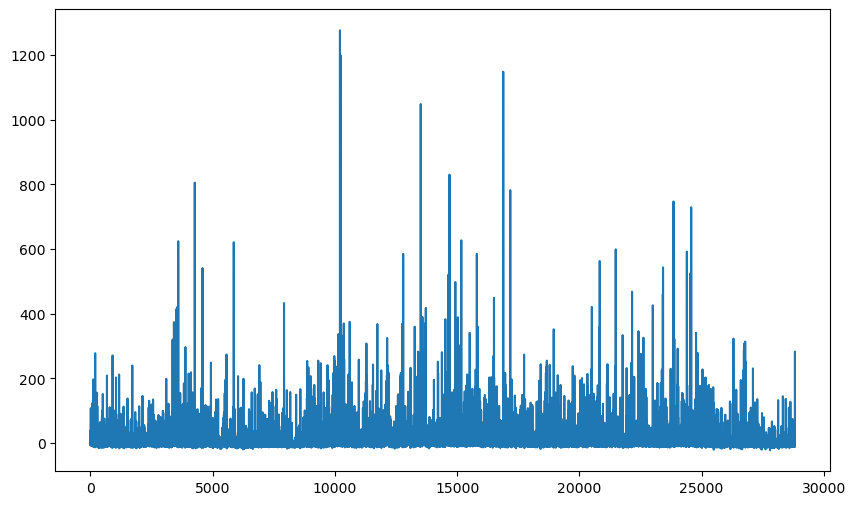

In [62]:
flight_df
flight_df['DEP_DELAY'].plot(figsize=(10, 6), label='departure delay')
flight_df.describe()

In [63]:
flight_df.columns.tolist().index('DEP_DELAY')
flight_df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,...,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,2.828348,31.019362,6.374983,225.288203,1267.746079,831.003851,828.934698,...,29.369917,57.732616,9.577793,12.367627,5.535323,30.092433,10.371131,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,1.865362,18.726958,38.735144,119.482417,889.343246,299.398525,305.864103,...,13.476928,23.468676,5.101199,6.259298,11.886457,0.296160,7.273523,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,0.000000,0.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,1.000000,15.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,...,20.000000,46.000000,6.000000,8.000000,0.000000,29.880000,3.000000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,3.000000,28.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,...,29.000000,59.000000,9.000000,12.000000,0.000000,30.110000,16.000000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,4.000000,48.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,...,38.000000,74.000000,15.000000,16.000000,0.000000,30.320000,16.000000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,8.000000,64.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,...,63.000000,97.000000,18.000000,36.000000,49.000000,30.750000,24.000000,55.000000,46.000000,41.000000


In [44]:
X = flight_df
Y = flight_df.DEP_DELAY

In [45]:
X.shape

(28820, 22)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [48]:
X_train_scaled.shape

(17292, 22)

In [49]:
X_test_scaled.shape

(11528, 22)

In [50]:
X_train_scaled = np.delete(X_train_scaled, 5, axis=1)
X_train_scaled.shape

(17292, 21)

In [51]:
X_test_scaled = np.delete(X_test_scaled, 5, axis=1)
X_test_scaled.shape

(11528, 21)

In [52]:
svm_model = SVR(kernel='poly', C=2.5)
svm_model.fit(X_train_scaled, y_train)

SVR(C=2.5, kernel='poly')

In [53]:
y_pred = svm_model.predict(X_test_scaled)

In [54]:
(((y_pred-y_test)**2).mean())**0.5

37.42271227700956

In [59]:
y_pred = svm_model.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# confm = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squar Error (RMS): {rmse:.2f}')
print(f'Coefficient of Determination (R^2): {r2:.2f}')
# print(f'Confusion Matrix:')
# print(confm)
# print(f'Classification Report:\n', classification_rep)

Mean Absolute Error (MAE): 11.83
Root Mean Squar Error (RMS): 37.42
Coefficient of Determination (R^2): 0.06


In [ ]:
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n', classification_rep)

In [ ]:
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n', classification_rep)

In [ ]:
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n', classification_rep)